In [109]:
# Importing packages
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as sps

In [110]:
#retrieve data
ticker = "STZ"
start = "2004-9-24"
end = "2024-9-24"

In [111]:
prices = np.array(yf.download(ticker,start,end)['Adj Close'])

[*********************100%%**********************]  1 of 1 completed


In [112]:
#calc returns
returns= np.log(prices[1:]/prices[:-1])
#sort returns 
returns= np.sort(returns)

In [113]:
#construct empirical distribution 
edf = np.arange(1, len(returns)+1)/len(returns)

In [114]:
mean= np.average(returns)
sd= np.std(returns)
normal_cdf= sps.norm.cdf(returns, mean,sd)

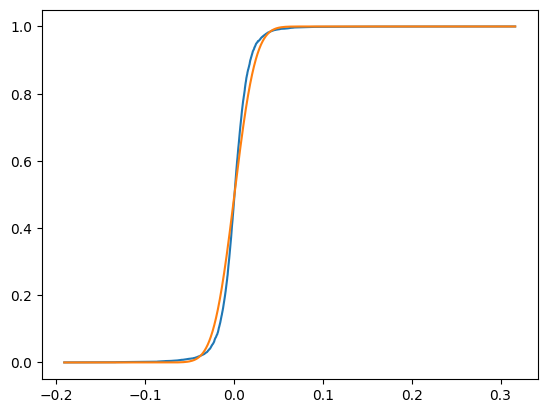

In [115]:
plt.plot(returns, edf)
plt.plot(returns, normal_cdf)
plt.show()

In [116]:
# conduct Kolmogorov–Smirnov test
p_value = np.exp(-max(abs(edf-normal_cdf))**2*len(returns))
if p_value<0.05:
    print('normal dist does not fit the data: p_value'+str(round(p_value,4)))
else:
    print('normal dist fits the data: p_value'+str(round(p_value,4)))

normal dist does not fit the data: p_value0.0
